In [1]:
import numpy as np
import numpy.typing as npt
from typing import Callable
import random
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
CrossSection = Callable[[float, float], float]
InteractionDensity = Callable[[float, float], float]
CrossSectionTotal = Callable[[float], float]
InteractionDensityTotal = Callable[[float], float]

def interaction_density_from_cross_section(cross_section: CrossSection, number_density: float) -> InteractionDensity:
    return lambda energy_in, angle_out: cross_section(energy_in, angle_out) * number_density
def interaction_density_from_cross_section_total(cross_section: CrossSectionTotal, number_density: float) -> InteractionDensityTotal:
    return lambda energy_in: cross_section(energy_in) * number_density

def cross_section_PROCESS(energy_in: npt.ArrayLike, angle_out: npt.ArrayLike) -> npt.NDArray:
    """
    arguments:
        - momentum_in[kg m /s]
        - angle_out[rad]
    returns[m2 /rad]:
    """
    return (np.cos(angle_out) + 1) * energy_in * 1e-24

# inputs: photon energy/angle number distribution
# outputs: electron energy/angle number distribution


# gamma spectrum stored throughout depth of material, iteravely refined 

In [3]:
classical_electron_radius = 2.81794032e-15  # [m]
elec_rest_energy = 8.1871057880e-14  # [J]

# def cross_section_compton(Z: int) -> tuple[CrossSectionTotal, CrossSection]:
#     C_tot = Z * 8/3 * np.pi * np.pow(classical_electron_radius,2)
#     def _cross_section_total(phot_energy_in):
#         k = phot_energy_in / elec_rest_energy
#         return C_tot*(
#             1/(1 + 2*k)**2
#         )*(
#             1
#             + 2 * k
#             + 6/5 * k**2
#             - 1/2 * k**3
#             + 2/7 * k**4
#             - 6/35 * k**5
#             + 8/105 * k**6
#             + 4/105 * k**7
#         )
#     def _cross_section(phot_energy_in, phot_angle_out):
#         raise "TODO"
#     return (_cross_section_total,_cross_section)

material_number_density = 19320000/196.97*6.02214076e23*79



def gamma_cross_section_density_total(energy_in: npt.NDArray) -> npt.NDArray:
    N = 100
    dtheta = np.pi/N
    angles = np.linspace(0,np.pi,N)
    energy_in_ = np.expand_dims(energy_in,axis=1).repeat(angles.shape[0],axis=1)
    angles_ = np.expand_dims(angles,axis=0).repeat(energy_in.shape[0],axis=0)

    # csd_compton = gamma_cross_section_density_compton(energy_in_, angles_)
    # csd_compton[np.isnan(csd_compton)] = 0
    # csd_compton_total = (csd_compton * np.pi*2 * np.sin(angles_) * dtheta).sum(axis=1)
    MeV = 1.6022E-13
    M = elec_rest_energy / energy_in
    s0 = 6.651e-25 * 1e-4 # [m2]
    a0 = 1/M
    csd_compton_total = s0 *3/8 *M *(np.log(2*a0)+0.5) * material_number_density

    return csd_compton_total

# returns [/m /st]
def gamma_cross_section_density_compton(
    energy_in: npt.NDArray, phot_angle_out: npt.NDArray
) -> npt.NDArray:
    # # return np.zeros_like(energy_in) + 0.001 * (1 + np.cos(phot_angle_out))/(np.pi*2)

    # a_0 = energy_in / elec_rest_energy
    # a = a_0 / (1 + a_0 * (1 - np.cos(phot_angle_out)))
    # elec_angle_out = np.arctan(1 / (a_0 + 1)) * np.sqrt((2 * a_0 * a) / (a_0 - a) - 1)

    # psi = elec_angle_out
    # value_0 = np.pow((a_0 + 1) * np.tan(psi), 2)

    # # [0609B], eqn 12
    # return (
    #     (classical_electron_radius**2 / 2)
    #     * ((2 * (a_0 + 1)) / (value_0 + 2 * a_0 + 1)) ** 2
    #     * (1 / (np.cos(psi) ** 3))
    #     * (
    #         1
    #         + ((value_0 - 1) / (value_0 + 1)) ** 2
    #         + (4 * a_0**2) / ((value_0 + 1) * (value_0 + 2 * a_0 + 1))
    #     )
    # ) * material_number_density
    # [0609B], eqn 11
    
    alpha_0 = energy_in / elec_rest_energy
    cos_theta = np.cos(phot_angle_out)
    
    return (
        classical_electron_radius**2
        * (
            1+cos_theta**2
        )/(
            1 + alpha_0 * (1 - cos_theta)
        )**2
        * (
            1
            + (
                alpha_0**2*(1-cos_theta)**2
            )/(
                (1+cos_theta**2)*(1+alpha_0*(1-cos_theta))
            )
        )
    ) * material_number_density


def compton_elec_params(
    phot_energy_in: npt.NDArray, phot_angle_out: npt.NDArray
) -> tuple[
    npt.NDArray,  # elec_energy_out
    npt.NDArray,  # elec_angle_out
]:
    a_0 = phot_energy_in / elec_rest_energy
    a = a_0 / (1 + a_0 * (1 - np.cos(phot_angle_out)))
    elec_energy_out = (a_0 - a) * elec_rest_energy
    elec_angle_out = np.arctan(1 / (a_0 + 1)) * np.sqrt((2 * a_0 * a) / (a_0 - a) - 1)
    return elec_energy_out, elec_angle_out
    raise "TODO"


def gamma_cross_section_density_pairproduction(energy_in, elec_angle_out):
    raise "TODO"

In [4]:
class FRange:
    def __init__(self, a:float, b:float, count:int):
        self.range = (a,b)
        self.count = count
    def as_ndarray(self):
        return np.linspace(self.range[0],self.range[1],self.count)
    def step_width(self):
        return (self.range[1]-self.range[0])/self.count
    def nearest_index(self, v: npt.ArrayLike):
        i = np.array(((np.array(v)-self.range[0])/(self.range[1]-self.range[0])*self.count).round().astype(np.dtypes.Int32DType))
        i[i < 0] = -1
        i[i >= self.count] = -1
        return i
    def nearest_index_f(self, v: npt.ArrayLike):
        return (np.array(v)-self.range[0])/(self.range[1]-self.range[0])*self.count

class Distribution:
    def __init__(self, energy_range:FRange, angle_range:FRange):
        self.energy_range = energy_range
        self.angle_range = angle_range
        self.number = np.zeros((energy_range.count+1, angle_range.count+1))
    def add(
        self,
        energy: npt.NDArray, 
        angle: npt.NDArray, 
        number: npt.NDArray,
    ):
        for i,(i_self_row,j_self_row) in enumerate(zip(
            iter(self.energy_range.nearest_index_f(energy)),
            iter(self.angle_range.nearest_index_f(angle)),
        )):
            for j,(i_self,j_self) in enumerate(zip(
                iter(i_self_row),
                iter(j_self_row),
            )):
                if i_self < 0 or i_self >= self.energy_range.count or abs(j_self) >= self.angle_range.count or np.isnan(i_self) or np.isnan(j_self):
                    continue
                n = number[i,j]

                i_i = int(i_self)
                k_i = i_self - i_i
                i_j = int(abs(j_self))
                k_j = abs(j_self) - i_j
                self.number[i_i,i_j] += (1-k_i)*(1-k_j)*n
                self.number[i_i,i_j+1] += (1-k_i)*k_j*n
                self.number[i_i+1,i_j] += k_i*(1-k_j)*n
                self.number[i_i+1,i_j+1] += k_i*k_j*n

        # # warning: duplicate indices will cause undercounting
        # self.number[
        #     self.energy_range.nearest_index(energy),
        #     self.angle_range.nearest_index(angle),
        # ] += number
        return self
    def add_direct(self,number: npt.NDArray):
        self.number += number
        return self
        


# def elec_number_attenuated(
#     elec_number: Distribution,
#     depth: float,
# ) -> npt.NDArray:
#     # TODO attenuate
#     return elec_number.number
def elec_number_attenuated_2(
    elec_energy: npt.NDArray,
    elec_angle: npt.NDArray,
    elec_number: npt.NDArray,
    depth: float,
) -> tuple[
    npt.NDArray, # elec_energy
    npt.NDArray, # elec_number
]:
    # TODO
    return elec_energy, elec_number


def one_ray(
    phot_energy: npt.NDArray,
    # phot_angle: npt.NDArray,
    phot_number: npt.NDArray,
    phot_out_angles: FRange,
    elec_energies: FRange, # i
    elec_angles: FRange, # j

    depth: float,
    n_steps = 1000,
): # [n,i,j]
    step_length = depth/n_steps
    # - initialize empty electron distribution output
    elec_number = Distribution(elec_energies,elec_angles)

    gamma_cross_section_density_total_ = gamma_cross_section_density_total(phot_energy)
    print(gamma_cross_section_density_total_)

    assert len(phot_energy.shape) == 1

    # c_phot_energy_in = np.expand_dims(phot_energy,axis=1).repeat(phot_out_angles.count,axis=1)
    # c_phot_angle_out = np.expand_dims(phot_out_angles.as_ndarray(),axis=0).repeat(phot_energy.shape[0],axis=0)
    # c_elec_number_raw = gamma_cross_section_density_compton(c_phot_energy_in, c_phot_angle_out) * step_length
    # c_elec_energy_raw, c_elec_angle_raw = compton_elec_params(c_phot_energy_in,c_phot_angle_out)
    # c_elec_number = Distribution(elec_energies,elec_angles).add(c_elec_energy_raw,c_elec_angle_raw,c_elec_number_raw)

    # - for each depth of incident ray through material
    for i in range(n_steps):
        current_depth = i * step_length
    #     - calculate photon number using total cross section
        phot_number_here = phot_number * np.exp(-current_depth * gamma_cross_section_density_total_)
    #     - add electron contributions from [compton, pair-production]
    #           (and account for attenuation due to depth in material)
        # elec_number.add_direct(
        #     elec_number_attenuated(c_elec_number, depth-current_depth) * phot_number_here
        # )
        c_phot_energy_in = np.expand_dims(phot_energy,axis=1).repeat(phot_out_angles.count,axis=1)
        c_phot_angle_out = np.expand_dims(phot_out_angles.as_ndarray(),axis=0).repeat(phot_energy.shape[0],axis=0)
        c_elec_number_raw = gamma_cross_section_density_compton(c_phot_energy_in, c_phot_angle_out)

        c_elec_number_raw[np.isnan(c_elec_number_raw)] = 0
        c_elec_number_raw *= np.pi * phot_out_angles.step_width()
        c_elec_number_raw *= np.sin(c_phot_angle_out)

        c_elec_energy_raw, c_elec_angle_raw = compton_elec_params(c_phot_energy_in,c_phot_angle_out)
        c_elec_energy, c_elec_number = elec_number_attenuated_2(c_elec_energy_raw, c_elec_angle_raw, c_elec_number_raw, depth-current_depth)
        elec_number.add(
            c_elec_energy, c_elec_angle_raw,
            c_elec_number * step_length * phot_number_here,
        )
    #     - emit secondary compton-scattered rays and add contributions (TODO)

    # - return electron distribution
    return elec_number


In [5]:
MeV = 1.6022E-13 # [J]

In [6]:
phot_energy = np.array([20 * MeV])
phot_out_angles = FRange(0,np.pi,10000)
c_phot_energy_in = np.expand_dims(phot_energy,axis=1).repeat(phot_out_angles.count,axis=1)
c_phot_angle_out = np.expand_dims(phot_out_angles.as_ndarray(),axis=0).repeat(phot_energy.shape[0],axis=0)
c_elec_number_raw = gamma_cross_section_density_compton(c_phot_energy_in, c_phot_angle_out)
c_elec_number_raw[np.isnan(c_elec_number_raw)] = 0
c_elec_number_raw *= np.pi * phot_out_angles.step_width()
c_elec_number_raw *= np.sin(c_phot_angle_out)
np.sum(c_elec_number_raw)/ np.sum(gamma_cross_section_density_total(phot_energy))

np.float64(0.9765885249970855)

[17.23641652]


array([0.01708872])

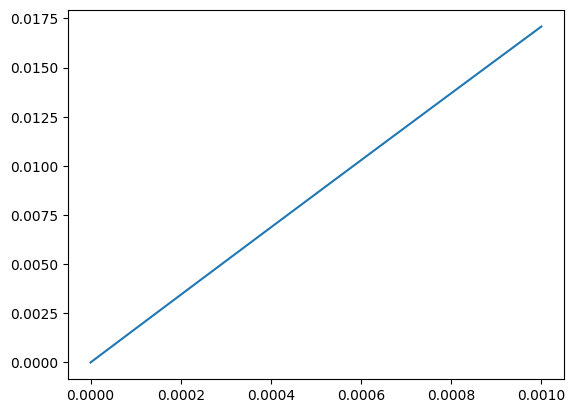

In [7]:
X = np.linspace(0,0.001,100)
gamma_cross_section_density_total_ = gamma_cross_section_density_total(np.array([16 * MeV]))
print(gamma_cross_section_density_total_)
plt.plot(X,1-np.exp(-gamma_cross_section_density_total_ * X))

1-np.exp(-gamma_cross_section_density_total_*1e-3)

[17.23641652]


/tmp/ipykernel_437174/2971116234.py:102: RuntimeWarning: divide by zero encountered in divide
  elec_angle_out = np.arctan(1 / (a_0 + 1)) * np.sqrt((2 * a_0 * a) / (a_0 - a) - 1)


np.float64(0.023427914457040348)

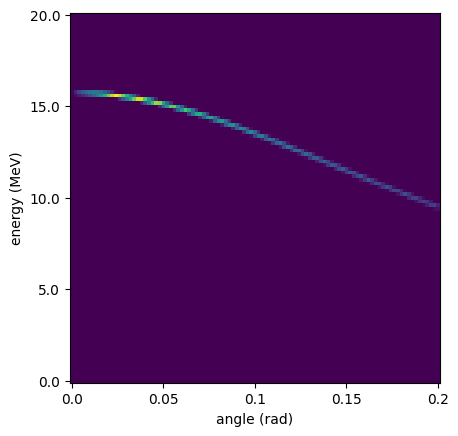

In [14]:
E_max_MeV = 20

v = one_ray(
    np.array([16 * MeV]),
    np.array([1]),
    FRange(0,np.pi,1000),
    FRange(0*MeV,E_max_MeV*MeV,100),
    FRange(0,0.2,100),
    0.002, #1 mm
    n_steps=1000
).number
plt.imshow(v[::-1])
plt.xlabel("angle (rad)")
plt.ylabel("energy (MeV)")
plt.xticks(np.linspace(0,100,5),np.linspace(0,0.2,5).round(decimals=2))
plt.yticks(np.linspace(0,100,5),np.linspace(E_max_MeV,0,5).round(decimals=2))

# plt.plot(v.sum(axis=1))
# plt.xlabel("energy (MeV)")
# plt.xticks(np.linspace(0,100,5),np.linspace(0,E_max_MeV,5))

# plt.plot(v.sum(axis=0))
# plt.xlabel("angle (rad)")
# plt.xticks(np.linspace(0,1000,5),np.linspace(0,2,5))

v.sum()

([<matplotlib.axis.XTick at 0x7b3575b05480>,
 [Text(0.0, 0, '0.0'),
  Text(25.0, 0, '5.0'),
  Text(50.0, 0, '10.0'),
  Text(75.0, 0, '15.0'),
  Text(100.0, 0, '20.0')])

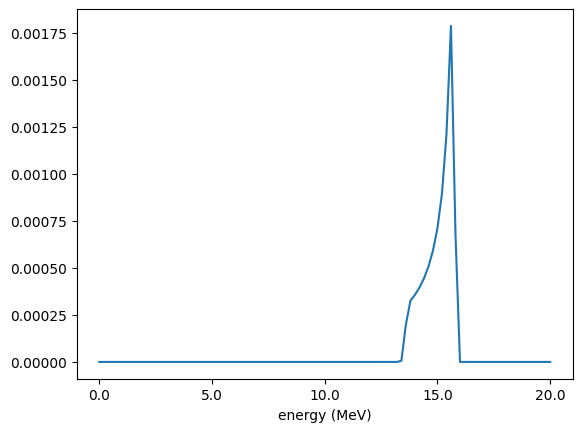

In [13]:
plt.plot(v[:,:50].sum(axis=1))
plt.xlabel("energy (MeV)")
plt.xticks(np.linspace(0,100,5),np.linspace(0,E_max_MeV,5))

([<matplotlib.axis.XTick at 0x734db7b54730>,
 [Text(0.0, 0, '0.0'),
  Text(25.0, 0, '0.05'),
  Text(50.0, 0, '0.1'),
  Text(75.0, 0, '0.15'),
  Text(100.0, 0, '0.2')])

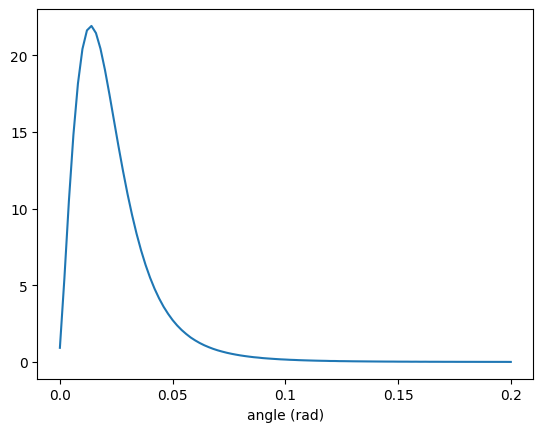

In [9]:
plt.plot(v.sum(axis=0))
plt.xlabel("angle (rad)")
plt.xticks(np.linspace(0,100,5),np.linspace(0,0.2,5).round(decimals=2))


In [120]:
x = np.array([0,1,2,3,4])
x[[0,0,1]] = [10,20,30]
x

array([20, 30,  2,  3,  4])

In [3]:

# def trace(
#     angle_spectrum_n: int,
#     angle_spectrum_range: float,
#     energy_spectrum_m: int,
#     energy_spectrum_range: tuple[float,float],

#     phot_number_in: npt.ArrayLike, # [n,m]

#     cross_section: CrossSection,
#     density: float,
# ) -> npt.ArrayLike: # elec_number_out [n,m]
#     pass


# def trace_step(
#     dx: float,

#     angle_spectrum_n: int,
#     angle_spectrum_range: float,
#     energy_spectrum_m: int,
#     energy_spectrum_range: tuple[float,float],

#     # cross_section(energy_spectrum,angle_spectrum) * number_density [n,m]
#     cross_section_density: npt.ArrayLike,

#     phot_number_in: npt.ArrayLike, # [n,m]

# ) -> tuple[
#     npt.ArrayLike, # phot_number_out [n,m]
#     npt.ArrayLike, # elec_number_out [n,m]
# ]:

    
#     a = cross_section_density

#     pass

# def trace_single(
#     phot_angle_in: float,
#     phot_energy_in: float,

#     interaction_density: InteractionDensity,

# ) -> list[(
#     float, # elec_angle_out
#     float, # elec_energy_out
# )]:
#     # P(depth>=x) = exp(-x interaction_density)
#     depth = interaction_density